# Installing and Importing Pyforest

In [41]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import accuracy_score

# Importing train and test data set

In [42]:
# importing .csv files using Pandas
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [43]:
# Checking the top 10 rows
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [44]:
# Checking the name of the columns
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [45]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Data Cleaning

In [46]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 2)

In [48]:
# train['Embarked'] = train['Embarked'].apply(lambda x: 0 if x == 'nan' else 1 if x == 'S' else 2 if x == 'C' else 3)

In [49]:
train.drop(columns=['Name','Ticket','Cabin', 'PassengerId', 'Parch', 'Embarked'], inplace=True)

In [50]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [51]:
train.dropna(inplace=True)

# Checking if Matplotlib and Seaborn was correctly imported

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

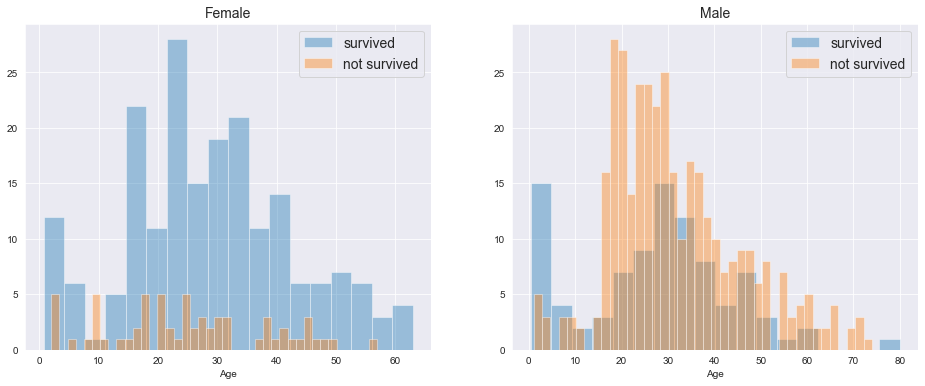

In [52]:
# checking the age and sex
survived = 'survived'
not_survived = 'not survived'

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
women = train[train['Sex']==2]
men = train[train['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend(fontsize=14)
ax.set_title('Female', fontsize=14)
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend(fontsize=14)
_ = ax.set_title('Male', fontsize=14)
plt.show()

In [53]:
# Making sure there is not any NaN values
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [54]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Train Test Split

In [55]:
X = train.drop(['Survived'], axis=1)
y = train.Survived

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<IPython.core.display.Javascript object>

# Modeling

In [57]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/ismaeltrevi/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/ismaeltrevi/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [ ]:
# Running all the models
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

<IPython.core.display.Javascript object>

In [20]:
print('Evaluation Metrics – Random Forest:')
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred, average='macro')))

Evaluation Metrics – Random Forest:
Accuracy: 0.776536312849162
F1 Score: 0.7641633728590251


In [21]:
rf = LogisticRegression()
rf.fit(X_train, y_train)
y_pred_lr = rf.predict(X_test)

<IPython.core.display.Javascript object>

In [22]:
print('Evaluation Metrics – Logistic Regression:')
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred_lr)))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred_lr, average='macro')))

Evaluation Metrics – Logistic Regression:
Accuracy: 0.770949720670391
F1 Score: 0.7562198970270719


# Testing Black

In [23]:
# !pip install nb_black

In [32]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = LogisticRegression()
rf.fit(X_train, y_train)
y_pred_lr = rf.predict(X_test)
print("Evaluation Metrics–Logistic Regression:")
print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred_lr)))
print("F1 Score: " + str(metrics.f1_score(y_test, y_pred_lr, average="macro")))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluation Metrics–Logistic Regression:
Accuracy: 0.770949720670391
F1 Score: 0.7562198970270719


<IPython.core.display.Javascript object>

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
rf=LogisticRegression()
rf.fit(X_train,y_train)
y_pred_lr=rf.predict(X_test)
print("Evaluation Metrics–Logistic Regression:")
print("Accuracy: "+str(metrics.accuracy_score(y_test,y_pred_lr)))
print("F1 Score: "+str(metrics.f1_score(y_test,y_pred_lr,average="macro")))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = LogisticRegression()
rf.fit(X_train, y_train)
y_pred_lr = rf.predict(X_test)
print("Evaluation Metrics–Logistic Regression:")
print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred_lr)))
print("F1 Score: " + str(metrics.f1_score(y_test, y_pred_lr, average="macro")))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluation Metrics–Logistic Regression:
Accuracy: 0.770949720670391
F1 Score: 0.7562198970270719


<IPython.core.display.Javascript object>